# TestCase 5

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config5.json")

### Configuration has been read from config.json ###
# dimension : 2
# testcase : 5
# version : 2
# error_estimations : {'param_num': 1}
# gains : {'n_params': 0}


In [3]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]  
high_degree = 10

In [4]:
assert testcase == 5
check_config(config)

Config file is valid


## Imports + Load network

In [5]:
# export CUDA_VISIBLE_DEVICES=
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
print(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "code"

/home/u2/lecourtier/Article1/code


In [8]:
testcase_dir = repo_dir + "/results/fenics/test_2D/testcase"+str(testcase)+"/version"+str(version)
if version == 1:
    from testcases.networks.test_2D.test_5.test_5_v1 import Run_laplacian2D,Poisson_2D
elif version == 2:
    from testcases.networks.test_2D.test_5.test_5_v2 import Run_laplacian2D,Poisson_2D 
elif version == 3:
    from testcases.networks.test_2D.test_5.test_5_v3 import Run_laplacian2D,Poisson_2D 
from testcases.problem.problem_2D import TestCase5
problem = TestCase5(version=version)

Using device: cpu
torch loaded; device is cpu


bigcenter :  [0.0, 0.0]
bigradius :  1.0
smallcenter :  [0.0, 0.0]
smallradius :  0.25
Threshold of the sampling:  0.0
Threshold of the sampling:  0.0
Threshold of the sampling:  0.0
Threshold of the sampling:  0.0
>> load network /home/u2/lecourtier/Article1/code/networks/test_2D/test_fe5_v2.pth
network loaded
Error  tensor([0.0003])


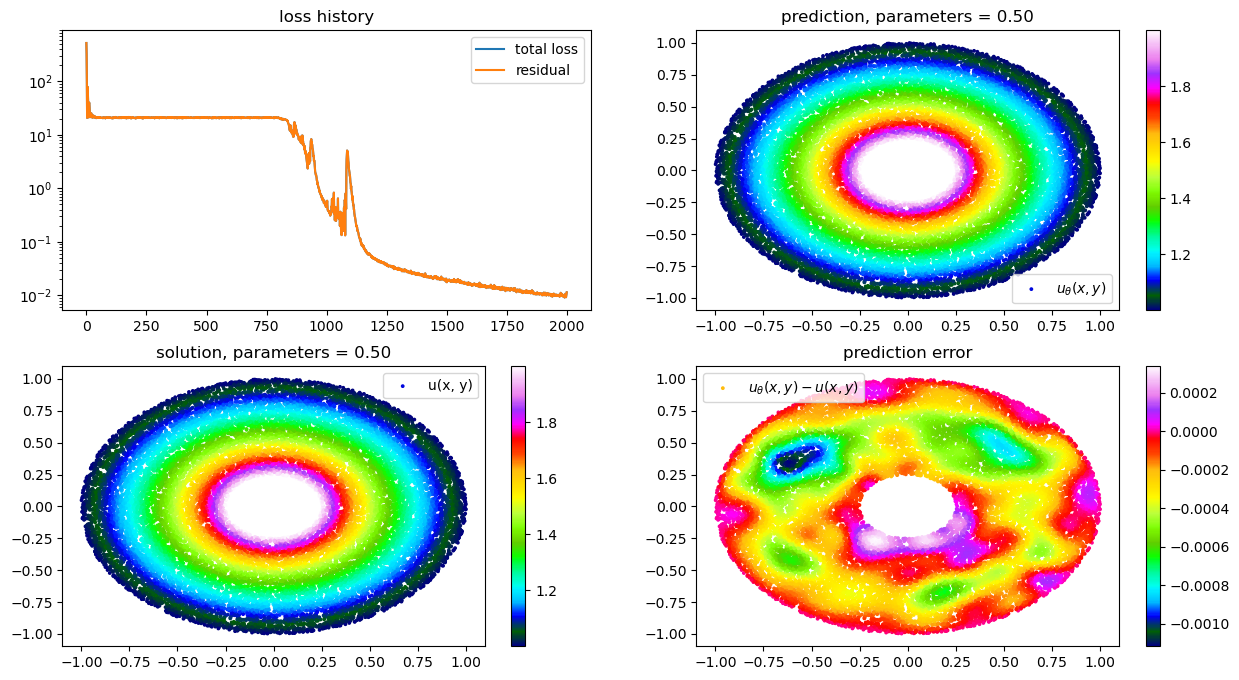

In [9]:
pde = Poisson_2D()
trainer,u_theta = Run_laplacian2D(pde)

## Error estimations

### Imports

In [ ]:
from modfenics.error_estimations.fem import compute_error_estimations_fem_deg,compute_error_estimations_fem_all
from modfenics.error_estimations.add import compute_error_estimations_Corr_deg,compute_error_estimations_Corr_all
from modfenics.error_estimations.compare import plot_Corr_vs_FEM_alldeg
from modfenics.error_estimations.compare import save_tab_alldeg_allM

/home/u2/lecourtier/miniconda3/envs/fenics_scimba_modules/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [ ]:
param_num = config["error_estimations"]["param_num"]     
result_dir = testcase_dir + "/cvg/param"+str(param_num)+"/"
create_tree(result_dir)

### Run FEM

In [12]:
degree = 1
df_FEM, tab_nb_vert_FEM, tab_h_FEM, tab_err_FEM = compute_error_estimations_fem_deg(param_num,problem,degree,high_degree,new_run=False,result_dir=result_dir)

## Run error estimation with FEM for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.005633800733210699
V created with  16  vertices and degree  4  : h = 0.16660094771444728
Building point search tree to accelerate distance queries.
Computed bounding box tree with 1053 nodes for 527 points.
Building point search tree to accelerate distance queries.
Computed bounding box tree with 929281 nodes for 464641 points.
nb_vert=16, norme_L2=0.02275195981078998
V created with  32  vertices and degree  4  : h = 0.08694977804807888
Building point search tree to accelerate distance queries.
nb_vert=32, norme_L2=0.0006977269671411755
Computed bounding box tree with 3893 nodes for 1947 points.
V created with  64  vertices and degree  4  : h = 0.04347576862597117
Building point search tree to accelerate distance queries.
nb_vert=64, norme_L2=0.000138871830013173
Computed bounding box tree with 15525 nodes for 7763 points.
V created with  128  vertices and degree  4  : h = 0.0219775

## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase5/version2/cvg/FEM_case5_v2_param1_degree1.csv
## Run error estimation with FEM for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.005633800733210699
V created with  16  vertices and degree  4  : h = 0.16660094771444728
Building point search tree to accelerate distance queries.nb_vert=16, norme_L2=0.0017196405277788466

Computed bounding box tree with 1053 nodes for 527 points.
Building point search tree to accelerate distance queries.
Computed bounding box tree with 929281 nodes for 464641 points.
V created with  32  vertices and degree  4  : h = 0.08694977804807888
Building point search tree to accelerate distance queries.
nb_vert=32, norme_L2=2.7344246162160396e-05
Computed bounding box tree with 3893 nodes for 1947 points.
V created with  64  vertices and degree  4  : h = 0.04347576862597117
Building point search tree to accelerate distance queries.
Computed bounding box tree with

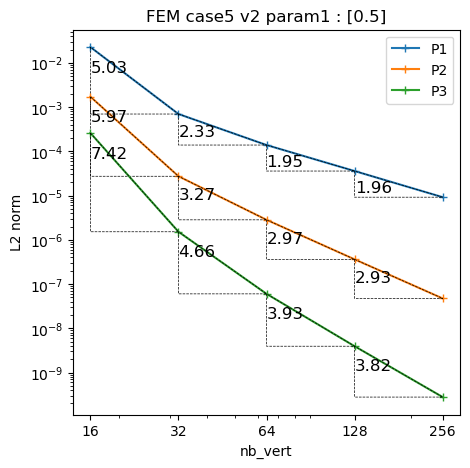

In [13]:
compute_error_estimations_fem_all(param_num,problem,high_degree,new_run=False,result_dir=result_dir,plot_cvg=True)

### Run Add

In [14]:
degree = 1
df_Corr, tab_nb_vert_Corr, tab_h_Corr, tab_err_Corr = compute_error_estimations_Corr_deg(param_num,problem,degree,high_degree,u_theta,new_run=False,result_dir=result_dir)

## Run error estimation with Corr (add) for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.005633800733210699
V created with  16  vertices and degree  4  : h = 0.16660094771444728


AttributeError: 'FacetNormal' object has no attribute '_cpp_object'

## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/cvg/Corr_case4_v1_param1_degree1.csv
## Run error estimation with Corr (add) for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.00563376918807859
Time to generate V_ex:  20.59114718437195
Time to generate mesh:  0.0042536258697509766
V created with  16  vertices and degree  4  : h = 0.16663035129479017
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Time to assemble the matrix :  1.7735555171966553
Time to solve the system : 0.01912713050842285
u_theta_Vex
u_ex
uex_Vex
Building point search tree to accelerate distance queries.
Computed bounding box tree with 809 nodes for 405 points.
Building point search tree to accelerate distance queries.
Time to compute the error : 7.006789922714233
nb_vert=16, norme_L2=2.254341785383592e-06
Computed bounding box tree with 746807 nodes for 373404 points.

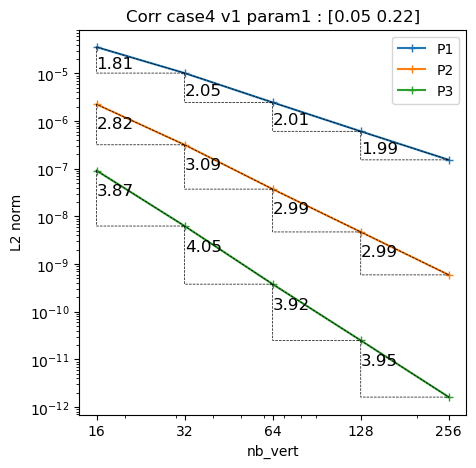

In [ ]:
compute_error_estimations_Corr_all(param_num,problem,high_degree,u_theta,new_run=False,result_dir=result_dir,plot_cvg=True)

### Save results

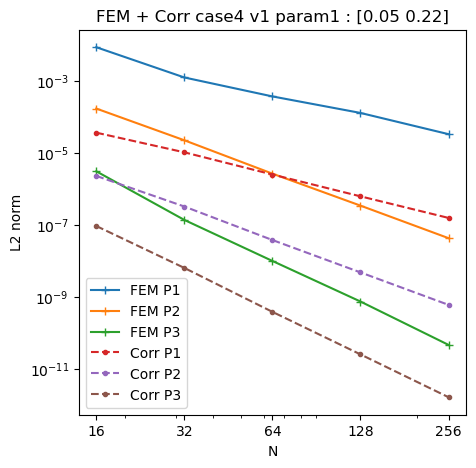

In [ ]:
plot_Corr_vs_FEM_alldeg(param_num,problem,result_dir=result_dir)

In [ ]:
save_tab_alldeg_allM(param_num,problem,result_dir=result_dir)

/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:185: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:185: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/comp